## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 筆記：np.random.random
原本預設的範圍是 0~1,可以透過「減0.5乘兩倍」，變成範圍是 -1~1

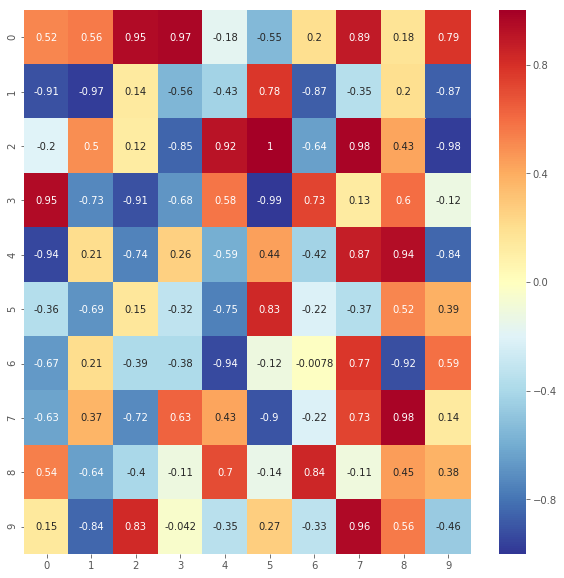

In [3]:
## 作業一：大小 10x10，數值分布 -1~1

"""
Your Code Here
"""
# 原本隨機 0.0 ~ 1.0, 減 0.5 乘兩倍 -> -1.0 ~ 1.0
matrix = (np.random.random((10,10)) - 0.5) * 2  
plt.figure(figsize=(10,10))
"""
Your Code Here
"""
# 使用 seaborn heatmap
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
plt.show()

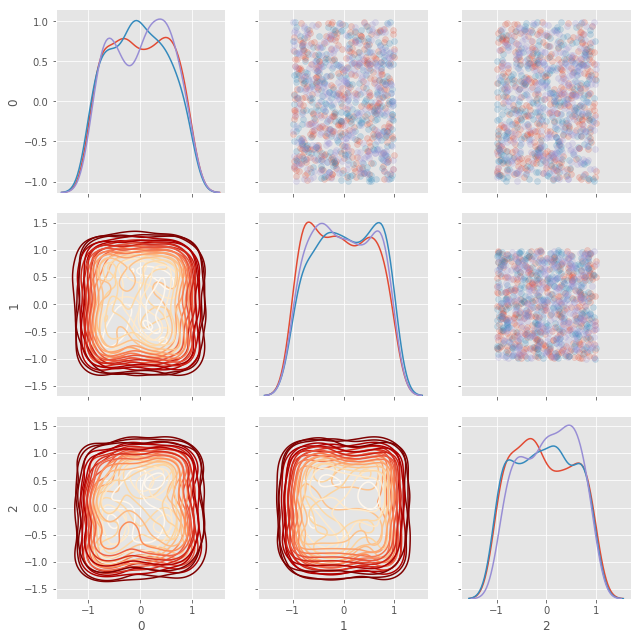

In [4]:
## 作業二：大小 1000x3，數值分布 -1~1

nrow = 1000
ncol = 3
"""
Your Code Here
"""
# 原本隨機 0.0 ~ 1.0, 減 0.5 乘兩倍 -> -1.0 ~ 1.0
matrix = (np.random.random((1000,3)) - 0.5)*2

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
"""
# 右上散佈圖, 對角線KDE, 左下density plot
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

## 筆記：隨機數值成常態分佈
1. np.random.randn跑出的是一維向量，利用reshape轉成1000x3矩陣
np.random.randn(nrow * ncol).reshape((nrow, ncol))
2. np.random.randn(nrow ,ncol)

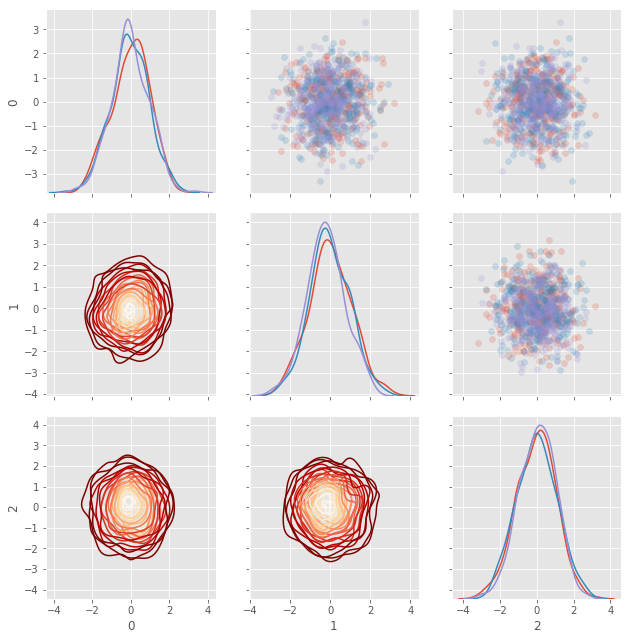

In [5]:
## 作業三：大小 1000x3，數值分布為常態分布

nrow = 1000
ncol = 3
"""
Your Code Here
"""
# 常態分布隨機
matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))
## 或是直接用 np.random.randn(nrow ,ncol)

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
"""
# 右上散佈圖, 對角線KDE, 左下density plot
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

## 比較：diag_sharey = True, False差別

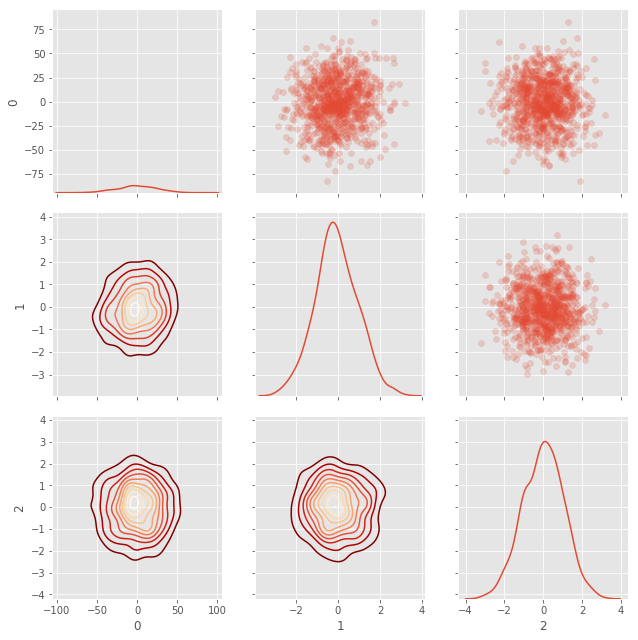

In [9]:
plot_data = pd.DataFrame(matrix, indice)
plot_data.reset_index(drop=True, inplace=True)
plot_data[0] = plot_data[0]*5
g = grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=True)
g = grid.map_upper(plt.scatter, alpha = 0.2)
g = grid.map_diag(sns.kdeplot)
g = grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

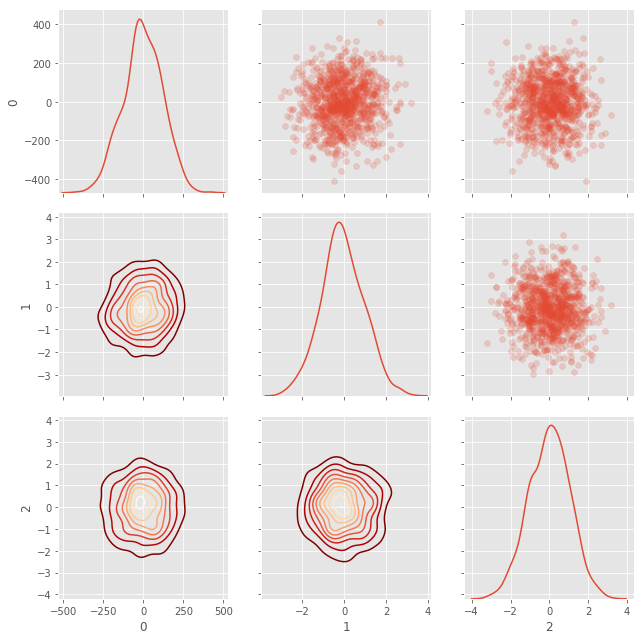

In [10]:
plot_data = pd.DataFrame(matrix, indice)
plot_data.reset_index(drop=True, inplace=True)
plot_data[0] = plot_data[0]*5
g = grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)
g = grid.map_upper(plt.scatter, alpha = 0.2)
g = grid.map_diag(sns.kdeplot)
g = grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)